In [1]:
from pdf2image import convert_from_path
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
pdf_file = "D:/AA_develop/parsing/2024/개정도/개정도_표지1.pdf"
# pdf_file = "D:/AA_develop/parsing/2024/개정도/개정도_표지2.pdf"
pages = convert_from_path(pdf_file)
pages

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1655x2340>]

In [3]:
pic_arr = np.asarray(pages[0])

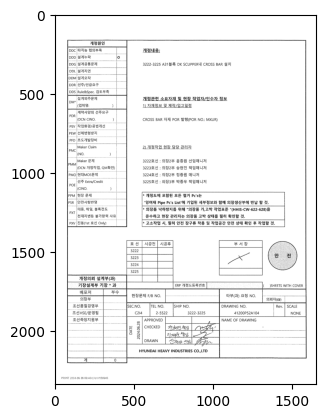

In [4]:
plt.imshow(pic_arr)
plt.show()

In [5]:
def deskew(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)
    coords = np.column_stack(np.where(gray > 0))
    angle = cv2.minAreaRect(coords)[-1]
    
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle

    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

    return rotated

In [14]:
# rotated_img = deskew(pic_arr)
# plt.imshow(rotated_img)
# plt.show()

In [27]:
import pytesseract

def extract_text_from_image(image):
    myconfig = r"--psm 3 --oem 3"
    text = pytesseract.image_to_string(image, lang="kor+eng", config=myconfig)
    return text

In [28]:

texts = extract_text_from_image(pic_arr)
print(texts)

개정원인
타직능 협의부족                          계정내용;
설계누락
설겨                                   3222-3225 431블록 DK SCUPPERL] CROSS BAR 설치

설계

설겨

선주/선급

Rule

개정관련 AQAA 및 현장 작업자/인수자 정보

1) 자재정보 및 제작/입고일정

CROSS BAR 자재 POR 발행(608 NO.: MXUR)

PEV ,작업환경/공법개선
PEW |선체변형방지
Pro 초도개발장비

wc M er Claim

ME (wo.              )
ee              322284 :
N 개정작업, QMO!                322384:
MOSER,                322454 :
322584 :

lo
ow
nN
20

선임매니저
책임매니저
매니저

책임매니저

Ho

16
ox
nN

oz of
애 애 딴 애
qo me [므 pe

jo
on
nN

40 40 4a 4a

Jo
o
wo
if

* 개정도에 포함된 모든 철거 Pc's=
“잉여재 Pipe Pc’s List’ 기입된 세부정보와 함께 의장생산부에 반납 할 것.
* 의장품 낙하방지를 위해 "의장품 가,고박 작업표준 "(HHIS-CW-622-628)S
수하고 현장 관리자는 의장품 고박 상태를 필히 확인할 것
소작업 시, 필히 안전 장구류 착용 및 작업공간 안전 상태 확인 후 작업할 것.

개정의뢰 설계부(과)
기장설계부 기장 * at                                    ERP 개정도등록번호                                        )SHEETS WITH COVER
배포처              부수
  현장문제 F/B NO.                               타부(과) 요청 No.
의장부                                                               

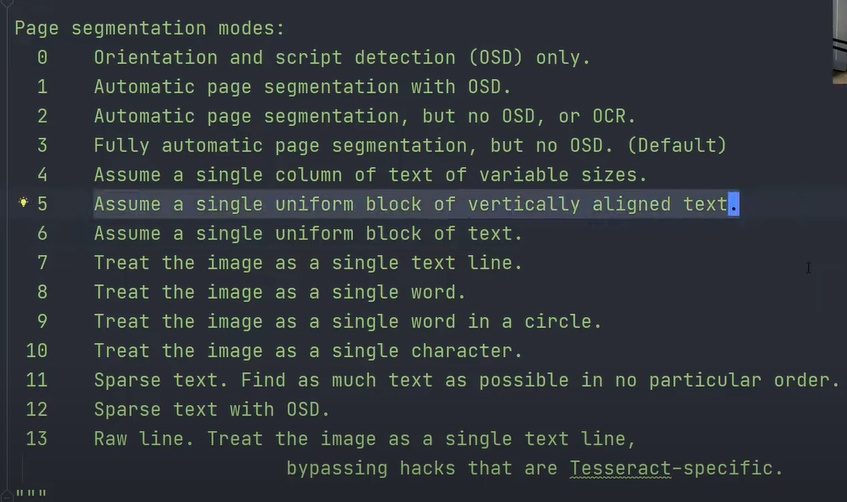

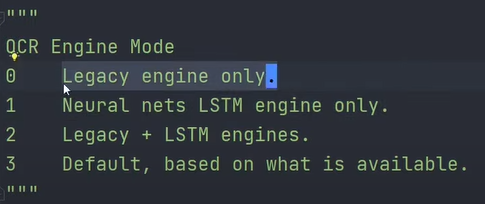

In [31]:
img = cv2.imread("D:\AA_develop\parsing\images\gaejung1\gaejung_0.png")

In [32]:
height, width, _ = img.shape
height, width

(1756, 1241)

In [33]:
boxes = pytesseract.image_to_boxes(img, config=myconfig)
boxes

"C 59 1629 60 1632 0\no 100 1600 174 1632 0\ne 61 1600 341 1632 0\nJ 59 1597 61 1599 0\no 66 1577 76 1600 0\no 78 1577 87 1589 0\nc 88 1577 97 1589 0\ne 103 1576 121 1600 0\nl 124 1576 136 1592 0\ns 138 1577 152 1591 0\na 160 1577 173 1592 0\nl 176 1576 190 1600 0\ne 191 1576 205 1591 0\ns 207 1576 221 1591 0\n| 313 1599 337 1600 0\nA 417 1573 433 1592 0\nU 436 1573 470 1592 0\nS 474 1573 490 1592 0\n: 492 1583 496 1586 0\n[ 59 1499 60 1502 0\no 66 1501 76 1523 0\no 78 1501 91 1523 0\ns 88 1501 104 1523 0\nw 105 1501 120 1526 0\na 121 1495 132 1539 0\nl 117 1501 154 1526 0\ns 143 1495 154 1539 0\ns 154 1501 169 1526 0\ne 172 1501 185 1526 0\na 186 1501 220 1526 0\n_ 291 1494 333 1502 0\n3 416 1511 424 1524 0\n2 426 1511 434 1524 0\n2 436 1511 443 1524 0\n2 446 1511 453 1524 0\n- 456 1515 460 1517 0\n3 463 1511 470 1524 0\n2 472 1511 480 1524 0\n2 482 1511 490 1524 0\n5 492 1511 500 1524 0\nA 507 1511 518 1524 0\n3 519 1511 527 1524 0\n1 529 1511 534 1524 0\n8 538 1510 571 1526 0\nD 580